# SPEOAU DATA HACKATHON - STARTER NOTEBOOK.

This starter notebook will help you get started on how you can make your first submission on Zindi.

Hackathon link: https://zindi.africa/competitions/speoau-data-hackathon

Import the necessary packages.

In [1]:
import pandas as pd #pandas is used for handling tabular data
import numpy as np #numpy for matrix and mathematical operations
#from catboost import CatBoostRegressor #a bossting tree model

import seaborn as sns # For plotting graphs
import matplotlib.pyplot as plt #For plotting graphs
%matplotlib inline

from sklearn.model_selection import KFold #KFOLD for cross validation
from lightgbm import LGBMRegressor #LGBM as a boosting tree model
from sklearn.metrics import mean_absolute_error #Check local score before submitting - for monitoring progress locally

import warnings #so that warnings don't show in the code
warnings.filterwarnings('ignore') #Hide warnings

Loading the dataset

In [2]:
train = pd.read_csv("Train.csv") #bring in the train data
test = pd.read_csv("Test.csv") #bring in the test data
sub = pd.read_csv("SampleSubmission.csv") #bring in the sample submissions data

Check the sample submission format

In [3]:
sub.head() #check out the first few rows of the sample submission

,ID,price actual
0,ID_027500,0
1,ID_027501,0
2,ID_027502,0
3,ID_027503,0
4,ID_027504,0


check out the test set

In [4]:
test.head(2) #check out the first two rows of the test dataset

,ID,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead
0,ID_027500,2022-02-19 20:00:00,396.0,652.0,0.0,8091.0,4553.0,338.0,0.0,0.0,...,116.0,343.0,0.0,6473.0,94.0,NaN,6686.0,37157.0,36934.0,6088.0
1,ID_027501,2022-02-19 21:00:00,395.0,619.0,0.0,7756.0,4591.0,339.0,0.0,0.0,...,92.0,341.0,0.0,6921.0,77.0,NaN,6805.0,36259.0,36227.0,6038.0


check the train set

In [5]:
train.head(2) #check out the first two rows of the train dataset

,ID,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,ID_000000,2019-01-01 00:00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,5010.0,6541.0
1,ID_000001,2019-01-01 01:00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,4810.0,6492.0


In [6]:
train.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,27482.00000,27483.000000,27483.0,27483.000000,27483.000000,27482.000000,27483.0,27483.0,27483.0,0.0,...,27482.000000,27483.0,27483.000000,27500.000000,0.0,27500.000000,27500.000000,27466.000000,27500.000000,27500.000000
mean,396.78022,476.247098,0.0,5555.281119,4411.479242,303.007059,0.0,0.0,0.0,NaN,...,261.802998,0.0,5469.452061,1439.292509,NaN,5469.240545,28639.632291,28621.754715,4764.150436,5610.960327
std,88.97453,363.187665,0.0,2252.850015,2015.548483,53.850784,0.0,0.0,0.0,NaN,...,51.346693,0.0,3194.413273,1677.600341,NaN,3179.516247,4600.880403,4577.680533,1432.890512,1424.710564
min,0.00000,0.000000,0.0,1518.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,206.000000,933.000000
25%,340.00000,0.000000,0.0,4069.000000,2618.000000,267.000000,0.0,0.0,0.0,NaN,...,228.000000,0.0,2968.500000,63.000000,NaN,2976.000000,24712.750000,24724.000000,3994.000000,4783.000000
50%,376.00000,558.000000,0.0,4871.000000,4698.000000,303.000000,0.0,0.0,0.0,NaN,...,269.000000,0.0,4851.000000,580.000000,NaN,4856.000000,28848.500000,28839.500000,4835.000000,5610.500000
75%,475.00000,856.000000,0.0,6269.000000,6062.500000,336.000000,0.0,0.0,0.0,NaN,...,303.000000,0.0,7367.000000,2646.000000,NaN,7365.250000,32151.000000,32082.750000,5700.000000,6530.250000
max,592.00000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,10199.000000,11680.000000


<AxesSubplot:xlabel='price actual', ylabel='Density'>

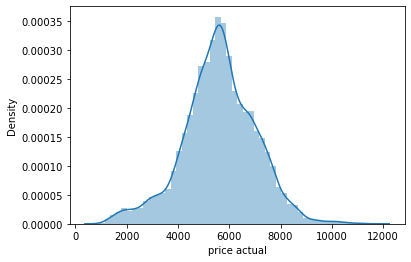

In [7]:
sns.distplot(train["price actual"]) #Check distribution of the test set.

<AxesSubplot:>

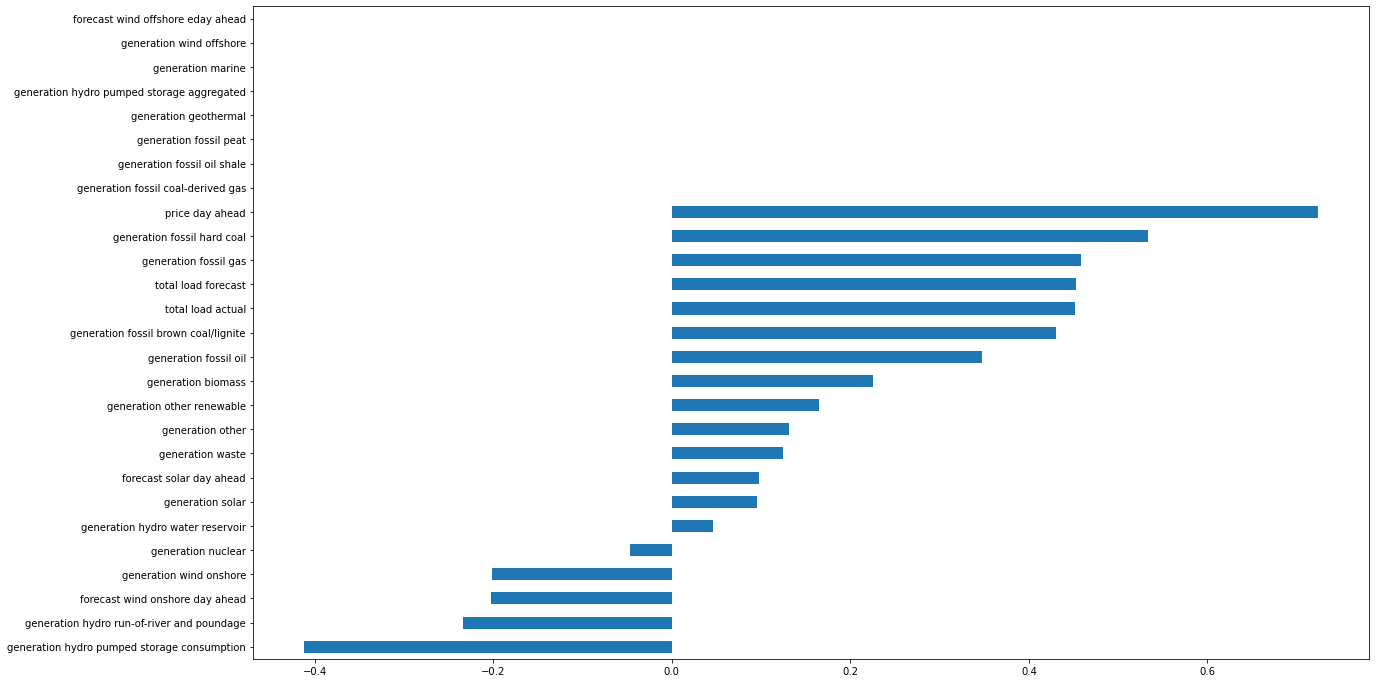

In [8]:
train.corr()['price actual'].drop("price actual").sort_values().plot(kind='barh', figsize=(20, 12)) #Confirm the data points with high correlation 

In [9]:
list_of_empty_columns = ["forecast wind offshore eday ahead", "generation wind offshore", "generation marine", "generation hydro pumped storage aggregated", "generation geothermal", "generation fossil peat", "generation fossil oil shale"]
train[list_of_empty_columns]

,forecast wind offshore eday ahead,generation wind offshore,generation marine,generation hydro pumped storage aggregated,generation geothermal,generation fossil peat,generation fossil oil shale
0,NaN,0.0,0.0,NaN,0.0,0.0,0.0
1,NaN,0.0,0.0,NaN,0.0,0.0,0.0
2,NaN,0.0,0.0,NaN,0.0,0.0,0.0
3,NaN,0.0,0.0,NaN,0.0,0.0,0.0
4,NaN,0.0,0.0,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...
27495,NaN,0.0,0.0,NaN,0.0,0.0,0.0
27496,NaN,0.0,0.0,NaN,0.0,0.0,0.0
27497,NaN,0.0,0.0,NaN,0.0,0.0,0.0
27498,NaN,0.0,0.0,NaN,0.0,0.0,0.0


In [10]:
train = train.drop(columns=list_of_empty_columns, axis = 1)
test = test.drop(columns=list_of_empty_columns, axis = 1)

train.shape, test.shape

((27500, 23), (7564, 22))

Get a description of what the data types look like and how many are missing

In [11]:
train.info() #get some information about the train set - we have missing data, some columns are even completely empty

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27500 entries, 0 to 27499
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ID                                           27500 non-null  object 
 1   time                                         27500 non-null  object 
 2   generation biomass                           27482 non-null  float64
 3   generation fossil brown coal/lignite         27483 non-null  float64
 4   generation fossil coal-derived gas           27483 non-null  float64
 5   generation fossil gas                        27483 non-null  float64
 6   generation fossil hard coal                  27483 non-null  float64
 7   generation fossil oil                        27482 non-null  float64
 8   generation hydro pumped storage consumption  27482 non-null  float64
 9   generation hydro run-of-river and poundage   27482 non-null  float64
 10

Extract Datetime features by doing some feature engineering - Feature Engineering means you create additional features that could help your model learn about the data better. In this example notebook, we'll create some date time features

In [12]:
train["time"] = pd.to_datetime(train["time"]) #Tell pandas to take that column as a datetime attribite not string
test["time"] = pd.to_datetime(test["time"]) #same for test set



train["month"] = train.time.dt.month #From the date, create a new feature in the data called month
train["year"] =  train.time.dt.year #create year as a feature
train["day"] = train.time.dt.day #create day as a feature
train["hour"] = train.time.dt.hour #create hour as a feature
train["is_month_end"] = train.time.dt.is_month_end #check if month is ending - create as a feature
train["is_quarter_end"] = train.time.dt.is_quarter_end #check if the quarter is ending- create as a feature
train["is_year_end"] = train.time.dt.is_year_end #check if the year is ending, create as a feature
      
      
      
test["month"] = test.time.dt.month
test["year"] =  test.time.dt.year
test["day"] = test.time.dt.day
test["hour"] = test.time.dt.hour
test["is_month_end"] = test.time.dt.is_month_end
test["is_quarter_end"] = test.time.dt.is_quarter_end
test["is_year_end"] = test.time.dt.is_year_end

Prepare data for training

In [13]:
y = train["price actual"] #Our target column is the price_actual variable
X = train.drop(["ID","time","price actual"], axis=1) #remove what we dont need from the dataset

Use a kfold cross validation method

In [14]:
fold_pred=[] # an empty list to store the out of fold predictions.
oof_pred = [] #an empty list to store the score of each fold.


fold= KFold(n_splits=7)#create some number of folds
for train_index, test_index in fold.split(X,y):     #use the fold to split the data
  
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] #set temporary data
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] #set temporary validation

    model = LGBMRegressor(objective = "mae",  n_estimators= 700, learning_rate= 0.06) #initialize a LGB model
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#Fit the model

    preds= model.predict(X_test) #Make predictions on the Test Set.
    print("err: ",(mean_absolute_error(y_test,preds))) #Print the MAE for each fold
    oof_pred.append(mean_absolute_error(y_test,preds)) #save the MAE for each old
    p2 = model.predict(test[X.columns]) #Predict on the test set
    fold_pred.append(p2) #save the predictions in a list and go back again to the top - for loop
    

print(np.mean(oof_pred)) #print the average score

err:  525.9588495686312
err:  403.2532925492813
err:  681.4334211433837
err:  259.72682796203867
err:  589.3576484236324
err:  276.502113882395
err:  472.87435286520616
458.4437866277955


Plot Feature importance

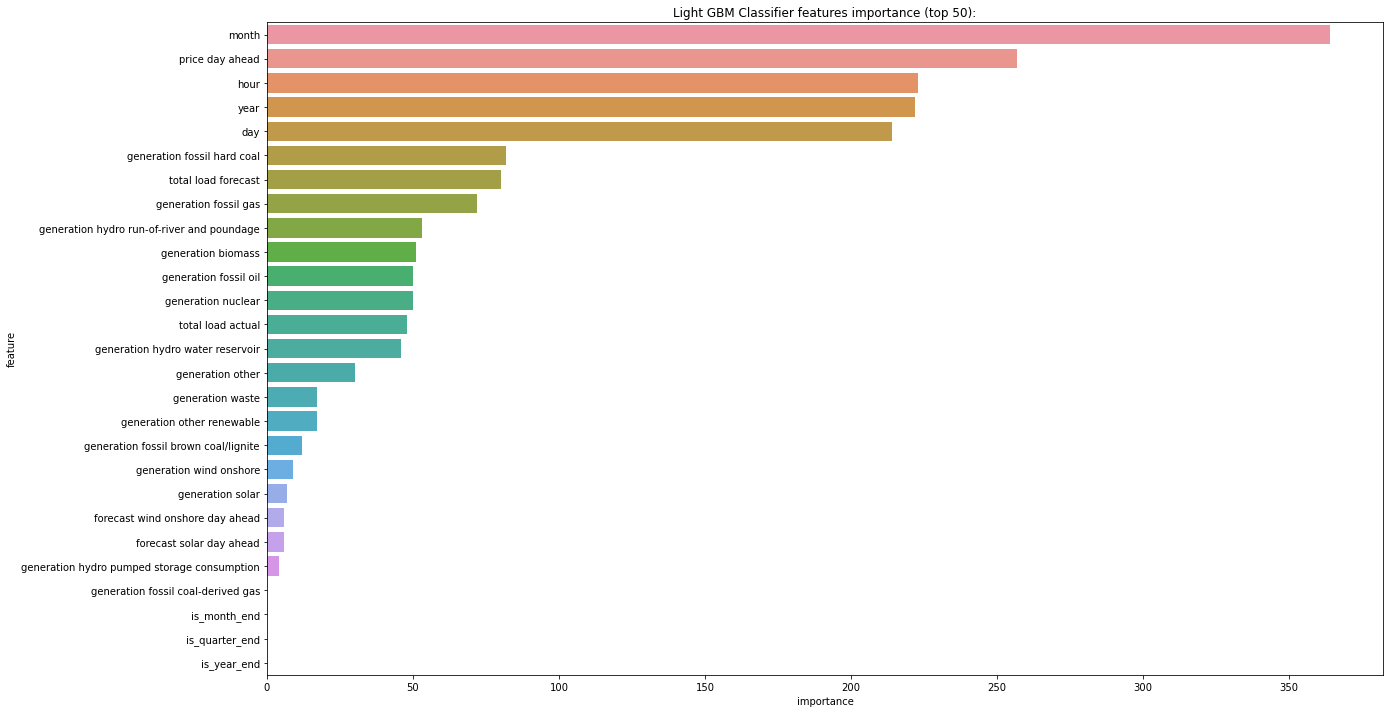

In [15]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance']) #set it into a tabular format
feature_importance_df['feature'] = X_train.columns #Choose columns that will show

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('Light GBM Classifier features importance (top 50):');

Average the out of fold predictions

In [16]:
sub['price actual'] =  np.mean(fold_pred, axis = 0) #Take the mean of the predictions to get an avaw

In [20]:
sub.tail()

,ID,price actual
7559,ID_035059,7701.404563
7560,ID_035060,7604.139621
7561,ID_035061,7455.394698
7562,ID_035062,7171.972464
7563,ID_035063,7164.496108


Make your First Submission

In [18]:
sub.to_csv('My First Zindi Submission.csv', index=False) #save as a CSV file

What to Try out. There's so much room for improvement. I'll give some ideas

1. Do more Exploration of the data
2. Handle missing values (read and google about this)
3. Check for Outliers
4. Use other boosting algorithms like catboost and XGBoost.


I am always open to assist enthusiasts with difficulties they are facing in Machine learning and Deep learning. Feel free to reach out to me: most preferably LinkedIn.

. [Twitter](https://twitter.com/Osinkoluolufemi).

. [Linkedin](https://www.linkedin.com/in/olufemi-victor-tolulope).

. [Github](https://github.com/osinkolu)

#### Author: Olufemi Victor Tolulope